In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import datetime



In [2]:
# my_string = str(input('Enter start date(yyyy-mm-dd): '))
# start = datetime.datetime.strptime(my_string, "%Y-%m-%d")
# my_string = str(input('Enter end date(yyyy-mm-dd): '))
# end = datetime.datetime.strptime(my_string, "%Y-%m-%d")
start = '2020-01-01'
end = '2022-01-01'

df = data.DataReader('AAPL','yahoo',start,end)

df=df.reset_index()
df=df.drop(['Date','Low','High','Open','Adj Close','Volume'],axis=1)
df.head()

,Close
0,73.412498
1,75.087502
2,74.357498
3,74.949997
4,74.597504


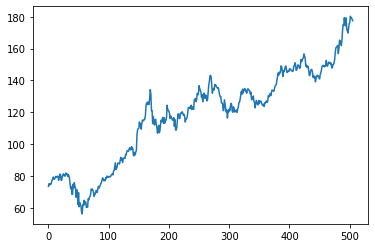

In [3]:
plt.plot(df.Close)

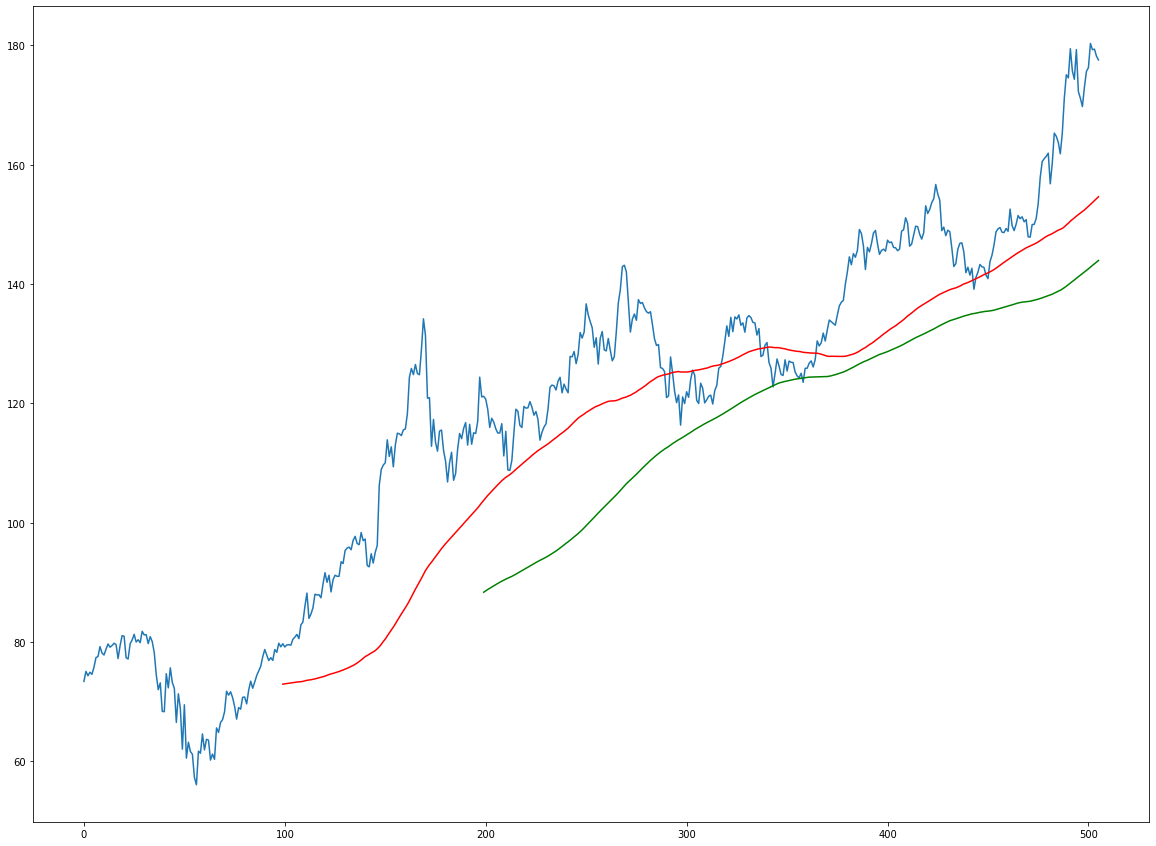

In [4]:
ma100 = df.Close.rolling(100).mean()
ma200 = df.Close.rolling(200).mean()
plt.figure(figsize=(20,15))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'green')


In [5]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])




In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_training_array = scaler.fit_transform(data_training)


In [7]:
x_train=[]
y_train=[]
for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

In [8]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [9]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential
model=Sequential()
model.add(LSTM(units=50,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

model.summary()

2022-03-15 15:37:44.478319: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-15 15:37:44.478346: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-03-15 15:37:46.329163: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-15 15:37:46.329717: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-15 15:37:46.329865: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.s

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [19]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,batch_size=1,epochs=100)

Epoch 1/100
254/254 [==============================] - 21s 75ms/step - loss: 0.0249
Epoch 2/100
254/254 [==============================] - 17s 68ms/step - loss: 0.0273
Epoch 3/100
254/254 [==============================] - 18s 70ms/step - loss: 0.0209
Epoch 4/100
254/254 [==============================] - 20s 77ms/step - loss: 0.0176
Epoch 5/100
254/254 [==============================] - 19s 76ms/step - loss: 0.0169
Epoch 6/100
254/254 [==============================] - 20s 77ms/step - loss: 0.0124
Epoch 7/100
254/254 [==============================] - 19s 76ms/step - loss: 0.0130
Epoch 8/100
254/254 [==============================] - 19s 74ms/step - loss: 0.0105
Epoch 9/100
254/254 [==============================] - 20s 77ms/step - loss: 0.0109
Epoch 10/100
254/254 [==============================] - 19s 73ms/step - loss: 0.0108
Epoch 11/100
254/254 [==============================] - 19s 76ms/step - loss: 0.0097
Epoch 12/100
254/254 [==============================] - 19s 77ms/step - lo

254/254 [==============================] - 20s 77ms/step - loss: 0.0089
Epoch 98/100
254/254 [==============================] - 20s 79ms/step - loss: 0.0077
Epoch 99/100
254/254 [==============================] - 20s 79ms/step - loss: 0.0066
Epoch 100/100
254/254 [==============================] - 20s 79ms/step - loss: 0.0068


In [20]:
model.save('stockmodel.h5')

In [12]:
past_100_days = data_training.tail(100)
final_df = past_100_days.append(data_testing,ignore_index=True)

d100 = data_testing.tail(100)


/tmp/ipykernel_498458/1083240139.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing,ignore_index=True)


In [13]:
input_data = scaler.fit_transform(final_df)
x_test=[]
y_test=[]
predictions=[]
for i in range(100,input_data.shape[0]):
    predictions.append(input_data[i-100:i])
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    
x_test,y_test=np.array(x_test),np.array(y_test)
y_predicted=model.predict(x_test)



scale_factor=1/scaler.scale_

<function matplotlib.pyplot.show(close=None, block=None)>

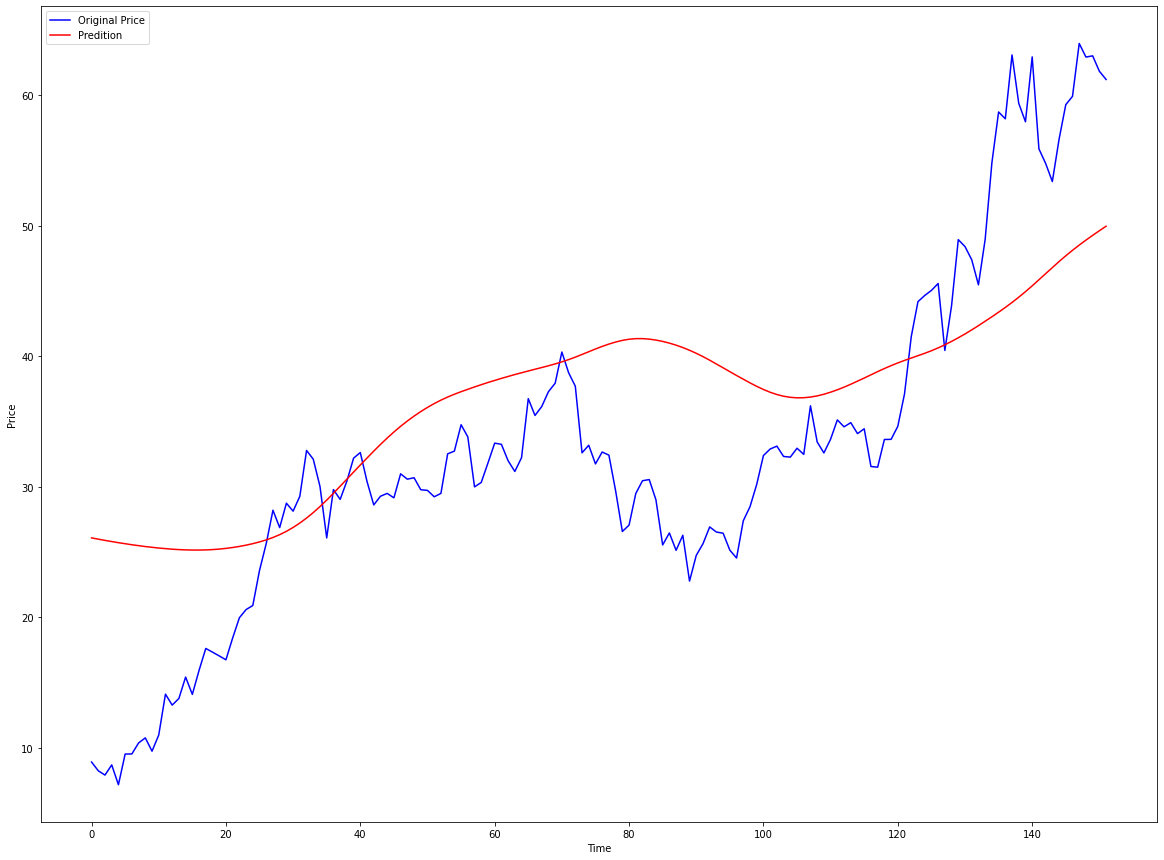

In [14]:
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor
plt.figure(figsize=(20,15))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predition')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show


In [15]:
def rsi(df, periods = 14, ema = True):
   
    close_delta = df['Close'].diff()

   
    up = close_delta.clip(lower=0)
    down = -1 * close_delta.clip(upper=0)
    
    if ema == True:
	    
        ma_up = up.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
        ma_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
    else:
       
        ma_up = up.rolling(window = periods, adjust=False).mean()
        ma_down = down.rolling(window = periods, adjust=False).mean()
        
    rsi = ma_up / ma_down
    rsi = 100 - (100/(1 + rsi))
    return rsi




rsi_ = rsi(df,14,True)

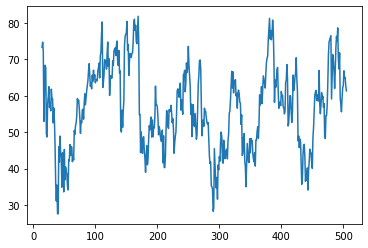

In [16]:
plt.plot(rsi_)

In [17]:
def get_sma(prices, rate):
    return prices.rolling(rate).mean()

def get_bollinger_bands(prices, rate=20):
    sma = get_sma(prices, rate)
    std = prices.rolling(rate).std()
    bollinger_up = sma + std * 2 # Calculate top band
    bollinger_down = sma - std * 2 # Calculate bottom band
    return bollinger_up, bollinger_down

bollinger_up, bollinger_down = get_bollinger_bands(df)

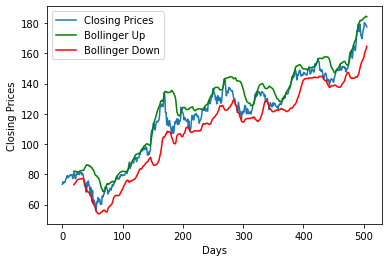

In [18]:

plt.xlabel('Days')
plt.ylabel('Closing Prices')
plt.plot(df, label='Closing Prices')
plt.plot(bollinger_up, label='Bollinger Up', c='g')
plt.plot(bollinger_down, label='Bollinger Down', c='r')
plt.legend()
plt.show()